In [ ]:
!pip install spacy


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz


In [ ]:
import spacy
import numpy as np
import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text,"...",tok.dep_)


The ... det
22 ... nummod
- ... punct
year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [ ]:
!pip install beautifulsoup4



In [ ]:
import re
import bs4
import requests
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth',200)
%matplotlib inline

In [ ]:
candidate_sen = pd.read_csv('drive/MyDrive/cleaned_originalCORD_pmc.csv')
candidate_sen.shape

(378, 5)

In [ ]:
candidate_sen.head()

,pmcid,publish_time,title,abstract,text
0,PMC1764036,2007-01-03,The Waiting Time for Inter-Country Spread of Pandemic Influenza,The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning. We quantify the distribution of this random...,"The emergence of a pandemic strain of influenza is considered inevitable . Provided the emerged strain is not too virulent, it may be possible to eliminate a nascent influenza pandemic in the sour..."
1,PMC1950082,2007-08-22,Estimating Individual and Household Reproduction Numbers in an Emerging Epidemic,"Reproduction numbers, defined as averages of the number of people infected by a typical case, play a central role in tracking infectious disease outbreaks. The aim of this paper is to develop meth...","The household is a fundamental unit of transmission for many directly transmitted infections. In addition, the household provides a “laboratory” within which key measures of transmission such as i..."
2,PMC2216029,2007-11-30,"Influenza activity in Europe during eight seasons (1999–2007): an evaluation of the indicators used to measure activity and an assessment of the timing, length and course of peak activity (spread)...",The European Influenza Surveillance Scheme (EISS) has collected clinical and virological data on influenza since 1996 in an increasing number of countries. The EISS dataset was used to characteri...,"Influenza has an important impact on societies each season. Surveillance data not only provide valuable information on the burden of disease in the population [1,2], but also enables an assessment..."
3,PMC2275240,2008-02-26,Epigrass: a tool to study disease spread in complex networks,"The construction of complex spatial simulation models such as those used in network epidemiology, is a daunting task due to the large amount of data involved in their parameterization. Such data,...",Epigrass is a platform for network epidemiological simulation and analysis. It enables researchers to perform comprehensive spatio-temporal simulations incorporating epidemiological data and model...
4,PMC2366072,2008-05-14,Real Time Bayesian Estimation of the Epidemic Potential of Emerging Infectious Diseases,"Fast changes in human demographics worldwide, coupled with increased mobility, and modified land uses make the threat of emerging infectious diseases increasingly important. Currently there is wo...","A pandemic of H5N1 influenza in birds is presently unfolding, with over 50 countries around the world affected, resulting in hundreds of millions of dead animals through infection or culling –. Th..."


In [ ]:
#taking 150 of 378 papers
sample = candidate_sen[:150].astype(str)

In [ ]:
sample['complete_text'] = sample['abstract'] + " " + sample['text']

In [ ]:
df = sample['complete_text'].astype(str)
df = df.to_frame(name='texts')

In [ ]:
df.head()

,texts
0,The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning. We quantify the distribution of this random...
1,"Reproduction numbers, defined as averages of the number of people infected by a typical case, play a central role in tracking infectious disease outbreaks. The aim of this paper is to develop meth..."
2,The European Influenza Surveillance Scheme (EISS) has collected clinical and virological data on influenza since 1996 in an increasing number of countries. The EISS dataset was used to characteri...
3,"The construction of complex spatial simulation models such as those used in network epidemiology, is a daunting task due to the large amount of data involved in their parameterization. Such data,..."
4,"Fast changes in human demographics worldwide, coupled with increased mobility, and modified land uses make the threat of emerging infectious diseases increasingly important. Currently there is wo..."


In [ ]:
from __future__ import unicode_literals, print_function
from spacy.lang.en import English # updated

raw_text = 'Hello, world. Here are two sentences.'
nlp_en = English()
nlp_en.add_pipe('sentencizer')
#doc = nlp(raw_text)
#sentences = [sent.text.strip() for sent in doc.sents]

In [ ]:
def sent_split(raw_text):
  doc = nlp_en(raw_text)
  sentences = [sent.text.strip() for sent in doc.sents]

  return sentences

In [ ]:
corpus_sent = []
for i in df['texts']:
  corpus_sent = corpus_sent + sent_split(i)

In [ ]:
print(corpus_sent[:5])
len(corpus_sent)

['The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning.', 'We quantify the distribution of this random time in terms of the separate components of this delay, and assess how the delay may be extended by non-pharmaceutical interventions.', 'METHODS AND FINDINGS The model constructed for this time delay accounts for (i) epidemic growth in the source region, (ii) the delay until an infected individual from the source region seeks to travel to an at-risk country, (iii) the chance that infected travelers are detected by screening at exit and entry borders, (iv) the possibility of in-flight transmission, (v) the chance that an infected arrival might not initiate an epidemic, and (vi) the delay until infection in the at-risk country gathers momentum.', 'Efforts that reduce the disease reproduction number in the source region below two and severe travel restrictions are most effective for delaying

3197

In [ ]:
# split_corpus_sent = []

# for sent in corpus_sent:
#     if "." in sent:
#         sent_split = sent.split(".")
#         # Extend the split_corpus_sent list with the split sentences
#         split_corpus_sent.extend(sent_split)
#     else:
#         # If the sentence does not contain ".", add it as is to the split_corpus_sent list
#         split_corpus_sent.append(sent)

# corpus_sent = split_corpus_sent

In [ ]:
len(corpus_sent)

3197

In [ ]:
corpus_sent.remove('.')
result = [x for x in corpus_sent if len(x) == 1]
print(result)

[]


In [ ]:
doc = nlp("The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning.")

for tok in doc:
  print(tok.text,'...',tok.dep_)

The ... det
time ... compound
delay ... nsubj
between ... prep
the ... det
start ... pobj
of ... prep
an ... det
influenza ... pobj
pandemic ... amod
and ... cc
its ... poss
subsequent ... amod
initiation ... conj
in ... prep
other ... amod
countries ... pobj
is ... ROOT
highly ... advmod
relevant ... acomp
to ... prep
preparedness ... compound
planning ... pobj
. ... punct


In [ ]:
!pip install Bio-Epidemiology-NER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 1.0 MB/s eta 0:00:00


In [ ]:
from Bio_Epidemiology_NER.bio_recognizer import ner_prediction

# Given text data

ner_df = pd.DataFrame()
for doc in corpus_sent:
  new_df = ner_prediction(corpus=doc, compute='cpu')
  new_df['sentence'] = doc
  ner_df = pd.concat([ner_df, new_df], ignore_index=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/Bio_Epidemiology_NER/bio_recognizer.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(final_df)
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio_Epidemiology_NER/bio_recognizer.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(disease_df) # adding the disease_df to existing
/usr/local/lib/python3.10/dist-packages/Bio_Epidemiology_NER/bio_recognizer.py:100: FutureWarning: The frame.append method is deprecated and will be r

In [ ]:
one_sent = 'The aim of this paper is to develop methods for estimating reproduction numbers which are simple enough that they could be applied with limited data or in real time during an outbreak.'
a = ner_prediction(corpus=one_sent, compute='cpu')
a

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio_Epidemiology_NER/bio_recognizer.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(disease_df) # adding the disease_df to existing
/usr/local/lib/python3.10/dist-packages/Bio_Epidemiology_NER/bio_recognizer.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(final_df)


,entity_group,value,score
0,Diagnostic_procedure,reproduction numbers,0.967887
1,Detailed_description,limited,0.856624


In [ ]:
ner_df.head()

,entity_group,value,score,sentence
0,Disease_disorder,influenza pandemic,0.929297,The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning.
1,Clinical_event,travel travelers,0.834417,"METHODS AND FINDINGS The model constructed for this time delay accounts for (i) epidemic growth in the source region, (ii) the delay until an infected individual from the source region seeks to tr..."
2,Disease_disorder,infection,0.546842,"METHODS AND FINDINGS The model constructed for this time delay accounts for (i) epidemic growth in the source region, (ii) the delay until an infected individual from the source region seeks to tr..."
3,Lab_value,below two,0.994820,"Efforts that reduce the disease reproduction number in the source region below two and severe travel restrictions are most effective for delaying a local epidemic, and under favourable circumstanc..."
4,Severity,severe,0.991706,"Efforts that reduce the disease reproduction number in the source region below two and severe travel restrictions are most effective for delaying a local epidemic, and under favourable circumstanc..."


In [ ]:
# Group by entity value and filter for entities with multiple entity groups
multiple_groups_entities = ner_df.groupby('value').filter(lambda x: x['entity_group'].nunique() > 1)

# Check if there are any such entities
if not multiple_groups_entities.empty:
    # Select a random entity with multiple entity groups
    random_entity = multiple_groups_entities.sample(n=1, random_state=42)

    # Get the entity value
    entity_value = random_entity['value'].iloc[0]

    # Filter rows for the selected entity value
    entity_rows = ner_df[ner_df['value'] == entity_value]

    # Print the entity value and its different entity groups along with their sentences
    print(f"Entity: {entity_value}")
    for group, sentence in entity_rows.groupby('entity_group'):
        print(f"- Entity Group: {group}")
        print(f"  Sentence: {sentence['sentence'].iloc[0]}")
else:
    print("No examples found where the same entity appears with different entity groups.")


Entity: malaria
- Entity Group: Coreference
  Sentence: One of the most considerable challenge in malaria control is the diversity of the vector and parasite species in different endemic regions which means distinct strategies must be considered for each geographical region .
- Entity Group: Disease_disorder
  Sentence: Environ Health Perspect 122631–638;  Considerable attention has been devoted to the possibility that climate change will exacerbate the burden of mosquito-borne diseases such as malaria and dengue, with important impacts on public health (Githeko et al.


In [ ]:
ner_df['value'] = ner_df['value'].apply(lambda x: ' '.join(set(x.split())))

In [ ]:
entities_df = ner_df.drop_duplicates(subset=['value'],keep='first')

In [ ]:
entities_df.head()

,entity_group,value,score,sentence
0,Disease_disorder,influenza pandemic,0.929297,The time delay between the start of an influenza pandemic and its subsequent initiation in other countries is highly relevant to preparedness planning.
1,Clinical_event,travelers travel,0.834417,"METHODS AND FINDINGS The model constructed for this time delay accounts for (i) epidemic growth in the source region, (ii) the delay until an infected individual from the source region seeks to tr..."
2,Disease_disorder,infection,0.546842,"METHODS AND FINDINGS The model constructed for this time delay accounts for (i) epidemic growth in the source region, (ii) the delay until an infected individual from the source region seeks to tr..."
3,Lab_value,below two,0.994820,"Efforts that reduce the disease reproduction number in the source region below two and severe travel restrictions are most effective for delaying a local epidemic, and under favourable circumstanc..."
4,Severity,severe,0.991706,"Efforts that reduce the disease reproduction number in the source region below two and severe travel restrictions are most effective for delaying a local epidemic, and under favourable circumstanc..."


In [ ]:
entities_df[entities_df['value']=='reproduction numbers']

,entity_group,value,score,sentence
33,Diagnostic_procedure,reproduction numbers,0.967887,The aim of this paper is to develop methods for estimating reproduction numbers which are simple enough that they could be applied with limited data or in real time during an outbreak.


In [ ]:
# Iterate through each unique sentence in ner_df
ent_per_sent={}
for sentence in ner_df['sentence'].unique():
    # Count the number of entities for the current sentence
    count = entities_df[entities_df['sentence'] == sentence].shape[0]
    ent_per_sent[sentence] = count

In [ ]:
max_count = max(ent_per_sent.values())
print(max_count)

19


In [ ]:
# sent=[sentence for sentence,count in ent_per_sent.items() if count ==max_count]
# sen = sent[0]
# print(sen)
# sent[0].split('.')

In [ ]:
# def removelong(corpus_sent,)
#   sen = 'For seasonal influenza, pre-exposure prophylaxis with NAIs has been shown to be effective in preventing the development of symptomatic infection in household contacts.5,6 Likewise, post-exposure prophylaxis with NAIs has also been effective in reducing the spread of infection in household contacts and communities.7,8 The emergence of the pandemic A(H1N1)pdm09 influenza virus in March–April 2009 resulted in a significant increase in the global use of NAIs for the treatment and prevention of infection.9 Early NAI treatment of infected individuals or patients displaying influenza-like symptoms was associated with reductions in both severe clinical outcomes and mortality during the 2009 pandemic.10 In addition, post-exposure oseltamivir prophylaxis was effective in reducing the rate of A(H1N1)pdm09 viral infections in households11 and closed institutional settings such as military camps.12 However, the therapeutic and prophylactic effectiveness of oseltamivir against mild seasonal influenza infections has been questioned following a meta-analysis of clinical trial data.13 Prior to the 2009 pandemic, countries proposed different strategies for the use of antivirals.'
#   if sen in corpus_sent:
#     index = corpus_sent.index(sen)
#   sp_sent = sen.split('.')
#   for i in sp_sent:
#     corpus_sent.insert(index,i)
#     index+=1
#   corpus_sent.remove(sen)
#   return corpus_sent

In [ ]:
entities_df.shape

(5967, 4)

In [ ]:
# Initialize a dictionary to store the selected entities per sentence
selected_entities_per_sentence = {}

# Iterate over each row in the DataFrame
for index, row in entities_df.iterrows():
    # Get the source sentence for the current entity
    source_sentence = row['sentence']

    # If the current sentence is not in the dictionary, create a new list for it
    if source_sentence not in selected_entities_per_sentence:
        selected_entities_per_sentence[source_sentence] = []

    # Check if the number of entities for the current sentence is less than two
    if len(selected_entities_per_sentence[source_sentence]) < 2:
        # Add the current entity to the list for the current sentence
        selected_entities_per_sentence[source_sentence].append(row['value'])

# Convert the dictionary of lists to a list of lists
selected_entities_lists = list(selected_entities_per_sentence.values())


In [ ]:
# ignoring sentences having only one entity extracted
entity_pair = [x for x in selected_entities_lists if len(x)==2]

In [ ]:
# Filter selected_entities_per_sentence to include only sentences with two entities
selected_entities_per_sentence_filtered = {sentence: entities for sentence, entities in selected_entities_per_sentence.items() if len(entities) == 2}

# Convert the filtered dictionary to a list of lists
selected_entities_lists_filtered = list(selected_entities_per_sentence_filtered.keys())


In [ ]:
len(selected_entities_lists_filtered)

1404

In [ ]:
entity_pair

[['travelers travel', 'infection'],
 ['below two', 'severe'],
 ['mask', 'moderate'],
 ['Elevated', 'minimally in-flight'],
 ['strain pandemic', 'influenza'],
 ['non-pharmaceutical', 'equipment protective'],
 ['overseas', 'SARS'],
 ['infected', 'of transmission chain'],
 ['reproduction numbers', 'limited'],
 ['measles numerical emerging method', 'measles'],
 ['transmission', 'households'],
 ['simple', 'tractable'],
 ['Scheme', 'European EISS'],
 ['EISS Europe', 'EISS'],
 ['sentinel reports clinical', 'good'],
 ['long', 'season influenza'],
 ['west-east', 'south-north'],
 ['sentinel reports', 'evaluated'],
 ['sentinel clinical', 'sentinel'],
 ['non-sentinel sentinel clinical', 'non-sentinel'],
 ['ILI', 'ARI'],
 ['15 15.6', '. 15.6'],
 ['sentinel GPs', 'longitude'],
 ['clinical data', 'physicians'],
 ['Surveillance data', 'burden'],
 ['virological via', 'Influenza European Surveillance Scheme'],
 ['Commission', 'ECDC'],
 ['inhabitants million 450', '12'],
 ['two types', 'virological activ

In [ ]:
# def get_entities(sent):
#   ##chunk1
#   ent1 = ''
#   ent2 = ''

#   prv_tok_dep = "" #dependency of the previous token in the sentence
#   prv_tok_text = "" #previous token in the sentence

#   prefix = ""
#   modifier = ""

#   ##################################

#   for tok in nlp(sent):
#     ##chunk2
#     # if token is a punctuation mark, then move on to next token
#     if tok.dep_ != "punct":
#       if tok.dep_ == "compound":
#         prefix = tok.text
#         # if the previous word was also a compound, then add the current word to it
#         if prv_tok_dep == "compound":
#           prefix = prv_tok_text + " " + tok.text

#       #check token is a modifier or not
#       if tok.dep_.endswith('mod')==True:
#         modifier = tok.text
#         # if the previous word was a compund then add current word to it
#         if prv_tok_dep == "compound":
#           modifier = prv_tok_text + " " + tok.text

#       if tok.dep_.find("subj") == True:
#         ent1 = modifier + " " + tok.text
#         prefix = ""
#         modifier = ""
#         prv_tok_dep = ""
#         prv_tok_text = ""

#         ##chunk 4
#       if tok.dep_.find("obj") == True:
#         ent2 = modifier + " " + prefix + " " + tok.text

#       #chunk 5
#       # update variables
#       prv_tok_dep = tok.dep_
#       prv_tok_text = tok.text

#   return [ent1.strip(),ent2.strip()]


In [ ]:
def get_relation(sent):

  doc = nlp(sent)
  matcher = Matcher(nlp.vocab)

  # Wrap the pattern in a list, even if it's only one:
  pattern = [
      [{'DEP':'ROOT'}, {'DEP':'prep', 'OP':"?"}, {'DEP':'agent', 'OP':"?"}, {'POS':'ADJ', 'OP':"?"}]
  ]

  matcher.add("matching_1", pattern)

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(selected_entities_lists_filtered)]

100%|██████████| 1404/1404 [00:22<00:00, 62.33it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

is                  80
was                 31
are                 18
were                18
found               18
[                   15
used                15
show                14
reported            14
shown               13
estimated           12
been                11
include              8
RESULTS              8
conducted            8
reported in          7
suggested            7
identified           7
had                  7
showed               7
be                   6
make                 6
shows                6
experienced          6
known                6
have                 6
present              6
developed            6
has                  5
proposed             5
demonstrated         5
determined           5
applied              5
provide              5
analyzed             5
implemented          5
observed in          5
characterized by     5
defined as           5
compared             5
spread from          4
understood           4
increase             4
resulted in

In [ ]:
print(selected_entities_lists_filtered[8])
print(relations[8])
entity_pair[8]

The aim of this paper is to develop methods for estimating reproduction numbers which are simple enough that they could be applied with limited data or in real time during an outbreak.
is


['reproduction numbers', 'limited']

In [ ]:
source = [i[0] for i in entity_pair]

# extract object
target = [i[1] for i in entity_pair]
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

,source,target,edge
0,travelers travel,infection,accounts for
1,below two,severe,are
2,mask,moderate,predicts
3,Elevated,minimally in-flight,reduces
4,strain pandemic,influenza,determined by
...,...,...,...
1399,epidemiological roles,season to,tend
1400,medical Electronic records,EMRs,address
1401,syndromic illness,EMRs EMR-based,are subject
1402,Influenza incidence,online search,provide massive


In [ ]:
kg_df.to_csv('kg_df.csv', index=False)


In [ ]:
from neo4j import GraphDatabase

# Connect to Neo4j
uri = "bolt://localhost:7687"
user = "neo4j"
password = "neo4j"
driver = GraphDatabase.driver(uri, auth=(user, password))

# Execute Cypher query to create nodes and relationships
cypher_query = """
LOAD CSV WITH HEADERS FROM 'file:///your_triples.csv' AS row
MERGE (s:Entity {name: row.Subject})
MERGE (o:Entity {name: row.Object})
MERGE (s)-[:RELATION {name: row.Predicate}]->(o)
"""
with driver.session() as session:
    result = session.run(cypher_query)


In [ ]:
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

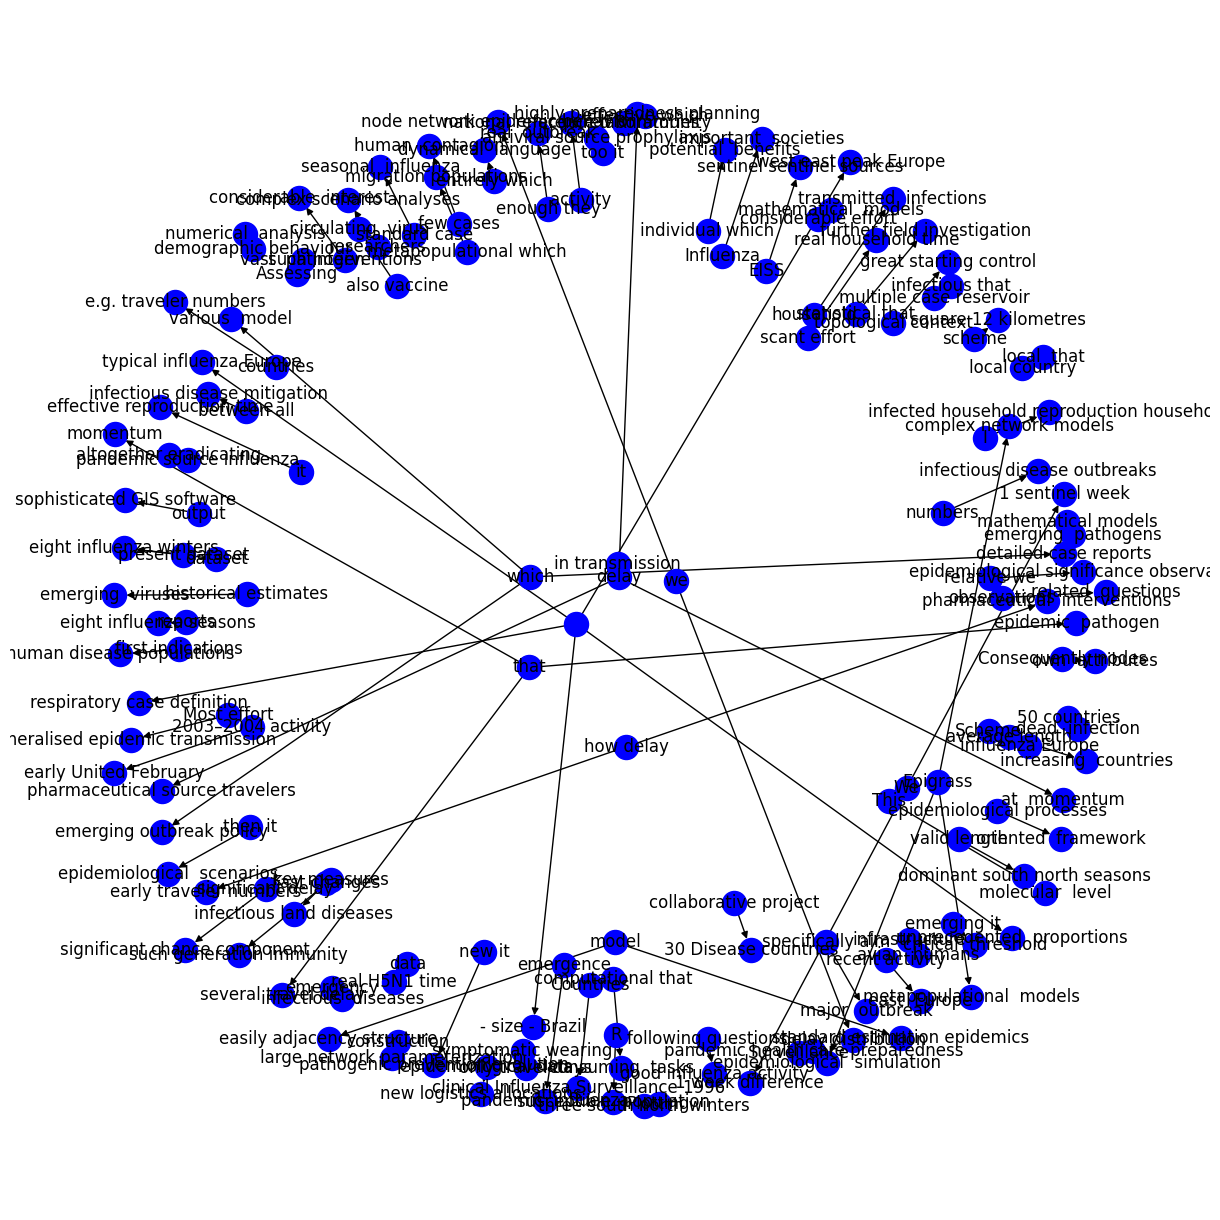

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='blue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

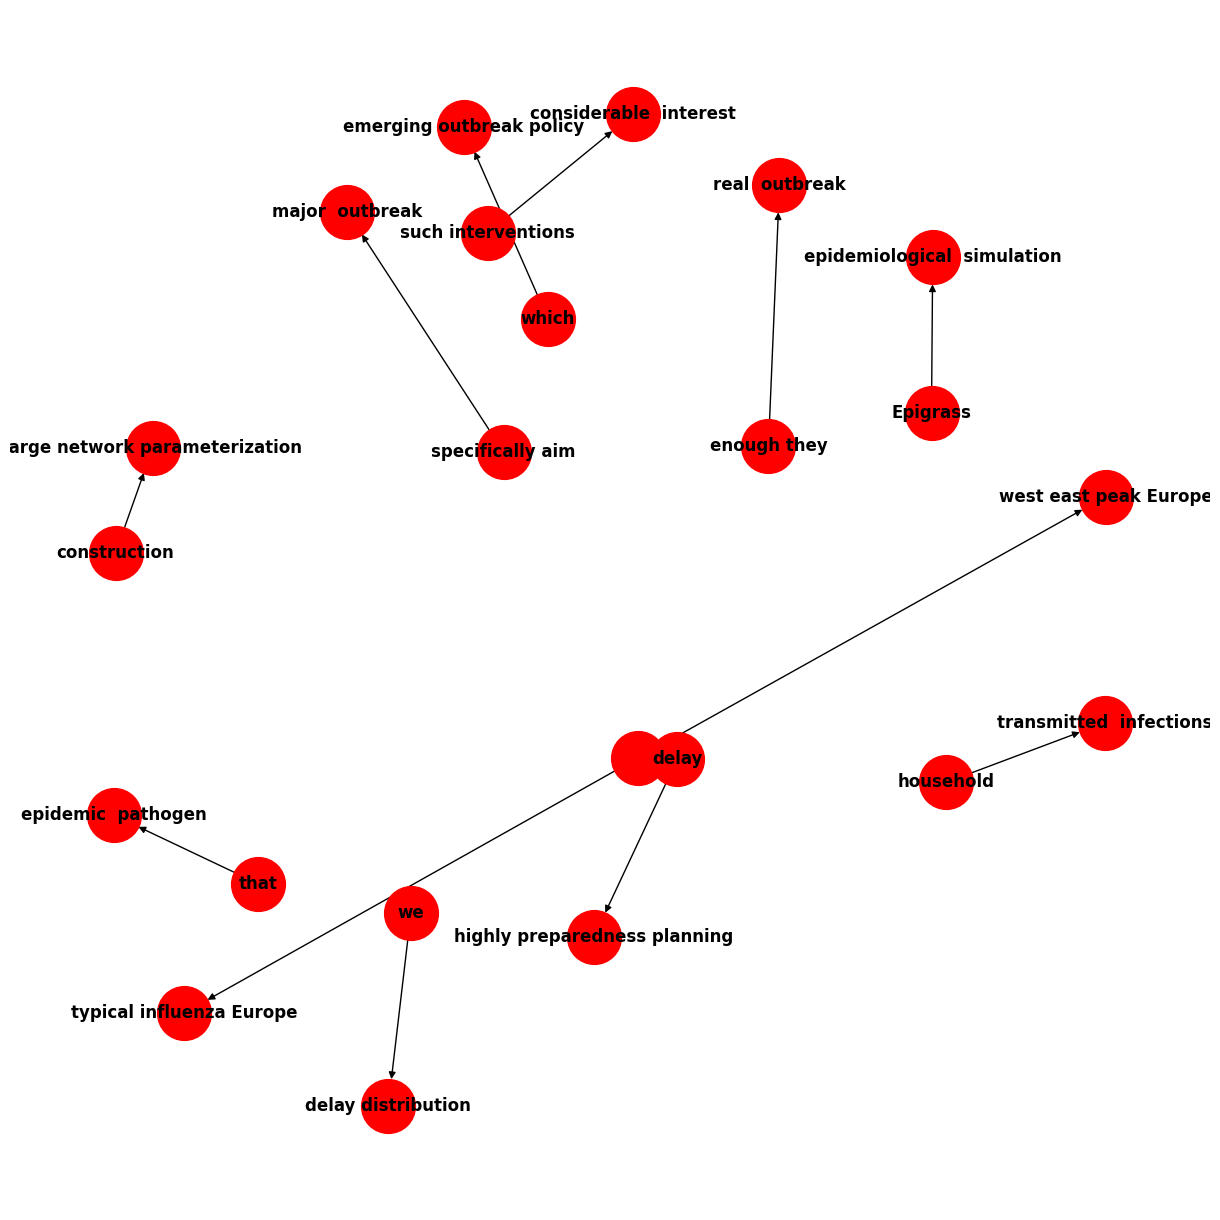

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()